<a href="https://colab.research.google.com/github/vandyahmad24/python_deeplearning/blob/master/2_Layer_Epcoh_100_3objek.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

!pip install Augmentor

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import Augmentor
import os

def perbanyak_(ini, sebanyak_ini):
  source_dir = ini
  output_dir = "."
  p = Augmentor.Pipeline(source_directory=source_dir, output_directory=output_dir)
  p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=1)
  p.rotate(probability=0.7, max_left_rotation=13, max_right_rotation=13)
  p.zoom_random(probability=0.5, percentage_area=0.9)
  p.crop_random(probability=0.6, percentage_area=0.9)
  p.resize(probability=1.0, width=64, height=64)

#p.sample(sebanyak_ini)
#perbanyak_("drive/My Drive/dataset_training/train/inova", 200)
# perbanyak_("drive/My Drive/dataset_training/train/agna", 200)
# perbanyak_("drive/My Drive/dataset_training/train/carry", 200)

#perbanyak_("drive/My Drive/dataset_training/test/inova", 30)
# perbanyak_("drive/My Drive/dataset_training/test/carry", 30)
# perbanyak_("drive/My Drive/dataset_training/test/agna", 30)

In [23]:
import glob
import matplotlib.pyplot as plt
#%matplotlib inline

def tampilkan_6_kali_5_gambar_pada_alamat(ini):
  a = glob.glob(ini)

  w=10
  h=10
  fig=plt.figure(figsize=(8, 8))
  columns = 6
  rows = 5
  for i in range(1, columns*rows +1):
      img = plt.imread(a[i])
      fig.add_subplot(rows, columns, i)
      plt.imshow(img)
  plt.show()


In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/agna/*")

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/carry/*")

In [ ]:
tampilkan_6_kali_5_gambar_pada_alamat("drive/My Drive/dataset_training/train/inova/*")

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy

size_ = 16

model = Sequential()

#-------------------------------------------------------------------------------------------
model.add(Conv2D(16, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#-------------------------------------------------------------------------------------------
model.add(Conv2D(16, (3, 3), input_shape = (7, 7, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
#------------------------------------------------------------------------------------------- digunakan untuk mengubah matrik menjadi panjang 1
model.add(Flatten())

model.add(Dense(units = 10, activation = 'relu'))
#-------------------------------------------------------------------------------------------

model.add(Dense(units = 3, activation = 'softmax'))

# model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [categorical_accuracy])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 16)          2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                650       
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3

In [11]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('drive/My Drive/dataset_training/train', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')
test_data = test.flow_from_directory('drive/My Drive/dataset_training/test', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')

Found 4536 images belonging to 3 classes.
Found 2136 images belonging to 3 classes.


In [ ]:
!rm -rf "drive/My Drive/dataset_training/test/.ipynb_checkpoints"

In [28]:
model.fit(train_data, steps_per_epoch = 100, epochs = 100, validation_data = test_data)

Epoch 1/100
100/100 [==============================] - 9s 89ms/step - loss: 0.7216 - categorical_accuracy: 0.7312 - val_loss: 0.6656 - val_categorical_accuracy: 0.7481
Epoch 2/100
100/100 [==============================] - 10s 96ms/step - loss: 0.5956 - categorical_accuracy: 0.7866 - val_loss: 0.5611 - val_categorical_accuracy: 0.7982
Epoch 3/100
100/100 [==============================] - 9s 93ms/step - loss: 0.4803 - categorical_accuracy: 0.8565 - val_loss: 0.4308 - val_categorical_accuracy: 0.8797
Epoch 4/100
100/100 [==============================] - 9s 87ms/step - loss: 0.3494 - categorical_accuracy: 0.9173 - val_loss: 0.3016 - val_categorical_accuracy: 0.9213
Epoch 5/100
100/100 [==============================] - 9s 88ms/step - loss: 0.2523 - categorical_accuracy: 0.9461 - val_loss: 0.2223 - val_categorical_accuracy: 0.9457
Epoch 6/100
100/100 [==============================] - 9s 87ms/step - loss: 0.1842 - categorical_accuracy: 0.9615 - val_loss: 0.1600 - val_categorical_accuracy

In [30]:
model.save_weights("2layer8conv16dan7size.h5")

In [17]:
#a = "drive/My Drive/dataset_training/test/agna/file_11.jpg"
import glob
carry = glob.glob("drive/My Drive/dataset_training/test/carry/*.jpg")
kijang = glob.glob("drive/My Drive/dataset_training/test/kijang/*.jpg")
panther = glob.glob("drive/My Drive/dataset_training/test/panther/*.jpg")
jumlah_dataset_carry = len(carry)
jumlah_dataset_kijang = len(kijang)
jumlah_dataset_panther = len(panther)

print(jumlah_dataset_carry)
print(jumlah_dataset_kijang)
print(jumlah_dataset_panther)


  

714
714
708


In [ ]:
# def tampilkan_(ini):
#   fig = plt.figure(figsize=(2, 2))
#   img = plt.imread(ini)
#   plt.imshow(img)
#   plt.show()

# #tampilkan_(a)
# for i in range(jumlah_dataset):
#   tampilkan_(agna[i])


In [18]:
def switch_dict_key_values(this_dict):
    return dict((v,k) for k,v in this_dict.items())

nama_train_data = switch_dict_key_values(train_data.class_indices)
print(nama_train_data)

{0: 'carry', 1: 'kijang', 2: 'panther'}


In [43]:
from keras.preprocessing import image
import numpy as np
#carry
total_carry = 0
for i in range(jumlah_dataset_carry):
  #print(carry[i])
  img = image.load_img(carry[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print(hasil)
  print("File gambar [", carry[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_carry += (0 == hasil[0])*1
print("Total Carry : ",total_carry)
print("Total Dataset carry :", jumlah_dataset_carry)
print("Total Akurasi : ",total_carry/int(jumlah_dataset_carry))



File gambar [ drive/My Drive/dataset_training/test/carry/carry_0.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_10.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_12.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_15.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_17.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_19.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_1.jpg ] diprediksi sebagai [0] alias terbaca sebagai ::  carry .
File gambar [ drive/My Drive/dataset_training/test/carry/carry_21.jpg ] diprediksi sebagai [0] alia

In [51]:
from keras.preprocessing import image
import numpy as np
#dataset-kijang
total_kijang_ = 0
for i in range(jumlah_dataset_kijang):
  #print(kijang[i])
  img = image.load_img(kijang[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print(hasil)
  print("File gambar [", kijang[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_kijang_ += (1 == hasil[0])*1
print("Total Kijang : ",total_kijang_)
print("Total Dataset Kijang :", jumlah_dataset_kijang)
print("Total Akurasi : ",total_kijang_/int(jumlah_dataset_kijang))

File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_0.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_14.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_17.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_18.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_19.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_1.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_20.jpg ] diprediksi sebagai [1] alias terbaca sebagai ::  kijang .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_24.jpg ] dipr

In [20]:
from keras.preprocessing import image
import numpy as np
#dataset-kijang
total_kijang_ = 0
for i in range(jumlah_dataset_kijang):
  #print(kijang[i])
  img = image.load_img(kijang[i], target_size = (size_, size_))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis = 0)

  hasil = model.predict_classes(img)
  #print(hasil)
  print("File gambar [", kijang[i], "] diprediksi sebagai", hasil, "alias terbaca sebagai :: ", nama_train_data[hasil[0]], ".")
  total_kijang_ += (1 == hasil[0])*1
print("Total Kijang : ",total_kijang_)
print("Total Dataset Kijang :", jumlah_dataset_kijang)
print("Total Akurasi : ",total_kijang_/int(jumlah_dataset_kijang))

File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_0.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  panther .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_14.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  panther .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_17.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  panther .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_18.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  panther .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_19.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  panther .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_1.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  panther .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_20.jpg ] diprediksi sebagai [2] alias terbaca sebagai ::  panther .
File gambar [ drive/My Drive/dataset_training/test/kijang/kijang_24.jpg

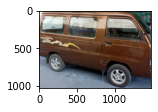

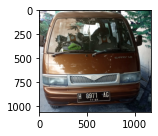

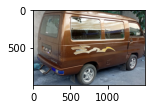

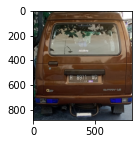

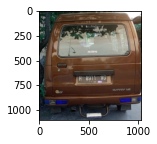

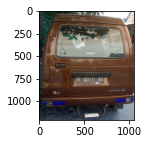

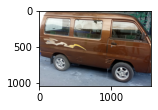

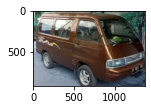

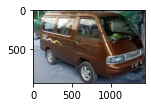

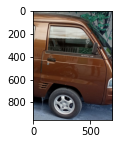

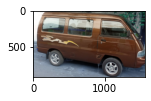

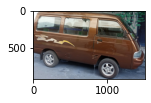

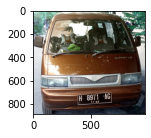

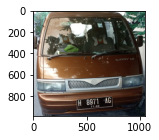

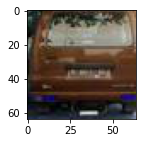

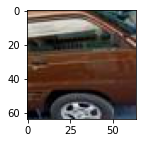

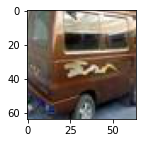

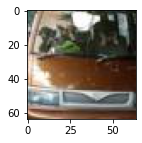

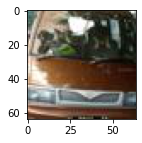

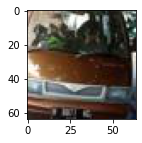

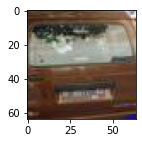

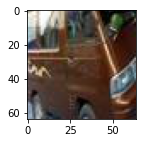

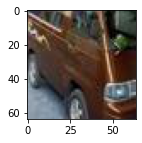

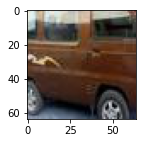

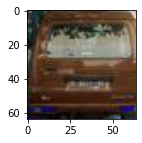

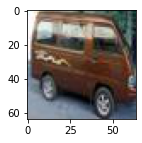

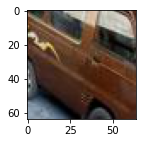

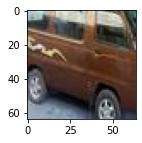

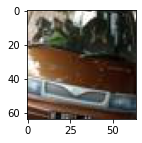

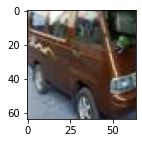

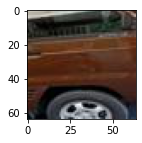

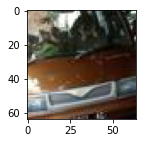

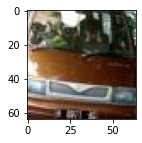

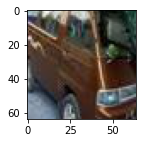

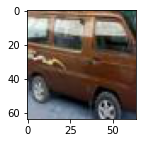

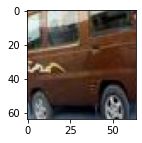

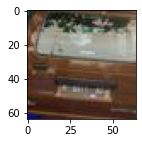

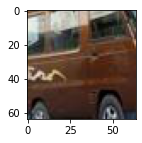

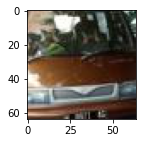

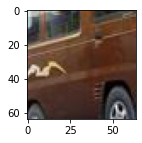

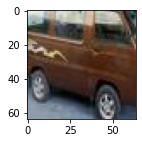

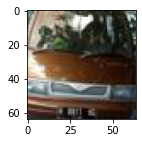

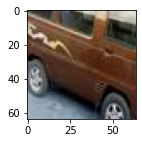

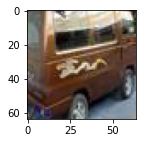

In [ ]:
def tampilkan_(ini):
  fig = plt.figure(figsize=(2, 2))
  img = plt.imread(ini)
  plt.imshow(img)
  plt.show()

#tampilkan_(a)
for i in range(jumlah_dataset_carry):
  tampilkan_(carry[i])